In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("DataAnalyst.csv")

In [4]:
df

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.\n2.5","Denver, CO","Alpharetta, GA",51 to 200 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,-1,-1
2249,2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics\n2.9,"Centennial, CO","Centennial, CO",10000+ employees,1935,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",-1
2250,2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),"Title: Technical Business Analyst (SQL, Data a...",-1.0,Spiceorb,"Denver, CO",-1,-1,-1,-1,-1,-1,-1,-1,-1
2251,2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services\n3.1,"Centennial, CO","West Chester, OH",201 to 500 employees,1984,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),-1,-1


In [5]:
df["Type of ownership"].unique()

array(['Nonprofit Organization', 'Company - Private',
       'Subsidiary or Business Segment', 'Company - Public', 'Hospital',
       'Unknown', 'Contract', '-1', 'Government',
       'School / School District', 'Other Organization',
       'College / University', 'Self-employed', 'Private Practice / Firm',
       'Franchise'], dtype=object)

In [6]:
df.describe()

,Unnamed: 0,Rating,Founded
count,2253.0000,2253.000000,2253.000000
mean,1126.0000,3.160630,1398.522858
std,650.5294,1.665228,901.929251
min,0.0000,-1.000000,-1.000000
25%,563.0000,3.100000,-1.000000
50%,1126.0000,3.600000,1979.000000
75%,1689.0000,4.000000,2002.000000
max,2252.0000,5.000000,2019.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(2),

In [8]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
df.shape

(2253, 15)

In [10]:
df.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

In [11]:
df = df.dropna(subset=['Company Name'])

In [12]:
df.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.describe(include='all')

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
count,2252,2252,2252,2252.000000,2252,2252,2252,2252,2252.000000,2252,2252,2252,2252,2252,2252
unique,1272,90,2252,NaN,1513,253,483,9,NaN,15,89,25,14,291,2
top,Data Analyst,$42K-$76K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,NaN,"Staffigo Technical Services, LLC\n5.0","New York, NY","New York, NY",51 to 200 employees,NaN,Company - Private,-1,Information Technology,Unknown / Non-Applicable,-1,-1
freq,404,57,1,NaN,58,310,206,421,NaN,1273,352,570,615,1731,2172
mean,NaN,NaN,NaN,3.162478,NaN,NaN,NaN,NaN,1399.144316,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.663286,NaN,NaN,NaN,NaN,901.646960,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,3.600000,NaN,NaN,NaN,NaN,1979.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,2002.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
for col in ['Job Title', 'Type of ownership', 'Industry','Sector']:
    print(df[col].value_counts())

Job Title
Data Analyst                        404
Senior Data Analyst                  90
Junior Data Analyst                  30
Business Data Analyst                28
Sr. Data Analyst                     21
                                   ... 
Data Analyst – Level II               1
Data Analyst/Programmer               1
Data Services Business Analyst 2      1
Call Center Data Analyst              1
Senior Quality Data Analyst           1
Name: count, Length: 1272, dtype: int64
Type of ownership
Company - Private                 1273
Company - Public                   452
-1                                 162
Nonprofit Organization             124
Subsidiary or Business Segment      89
Government                          37
College / University                34
Hospital                            19
Unknown                             16
Other Organization                  13
Contract                            11
School / School District             9
Private Practice / Firm 

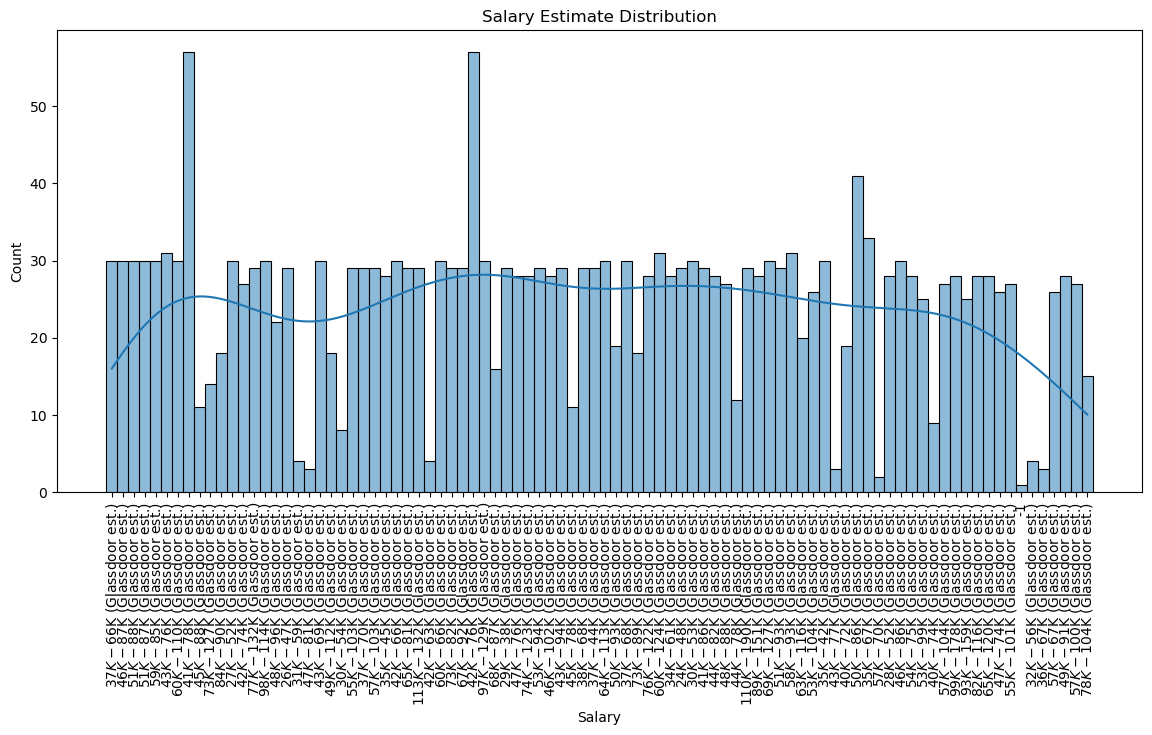

In [16]:
plt.figure(figsize=(14, 6))
sns.histplot(df['Salary Estimate'], kde=True, bins=20)
plt.title("Salary Estimate Distribution")
plt.xlabel("Salary")
plt.xticks(rotation=90)
plt.show()

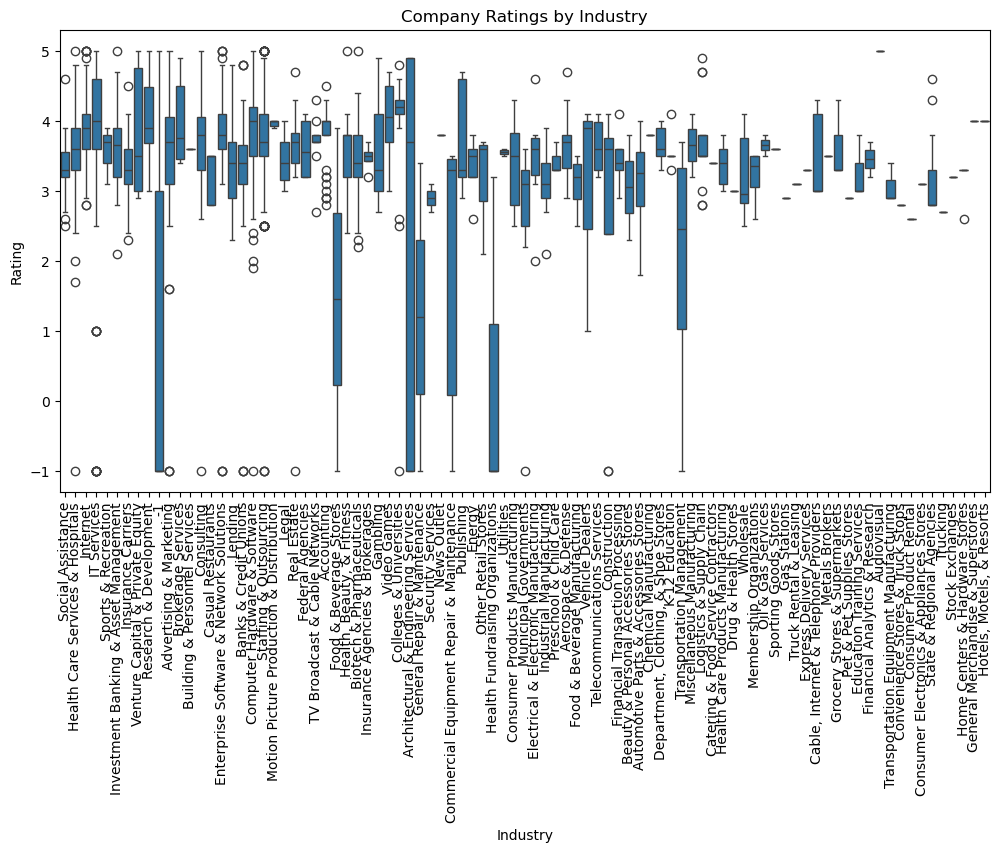

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Industry', y='Rating', data=df)
plt.xticks(rotation=90)
plt.title("Company Ratings by Industry")
plt.show()

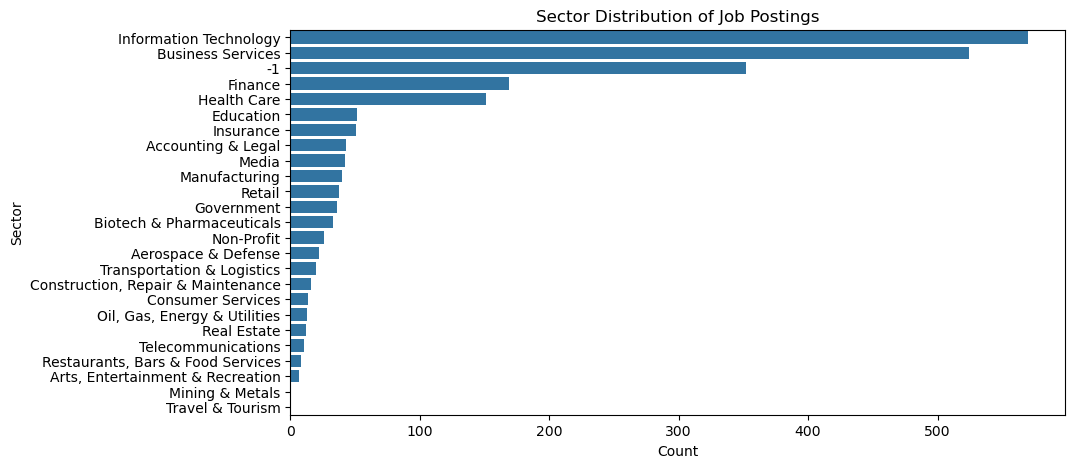

In [18]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df["Sector"].value_counts().values,  
            y=df["Sector"].value_counts().index)

plt.xlabel("Count")
plt.ylabel("Sector")
plt.title("Sector Distribution of Job Postings")
plt.show()


Insights from Sector Distribution of Job Postings
Dominant Sectors

The Information Technology (IT) sector has the highest number of job postings, suggesting strong demand for IT professionals.
Business Services follows closely, indicating a significant job market in consultancy, management, and financial services.
High Demand Industries

Finance and Healthcare sectors are also prominent, highlighting the need for data-driven decision-making, compliance, and innovation.
Education, Insurance, and Accounting & Legal are mid-tier in job postings, reflecting stable career opportunities in these industries.
Smaller Sectors

Sectors like Mining & Metals, Travel & Tourism, and Arts & Entertainment have fewer job postings, suggesting lower demand or specialized roles in these industries.
Non-Profit and Government sectors have some presence, but opportunities might be more niche compared to private industries.
Potential Anomalies

The presence of -1 as a category suggests missing or misclassified data. This should be checked and cleaned in preprocessing.

In [19]:
df.replace({'Competitors': '-1', 'Easy Apply': '-1','Salary Estimate': '-1'}, np.nan, inplace=True)
df['Easy Apply'].fillna(False, inplace=True)
df['Competitors'].fillna("No competitor", inplace=True)

In [20]:
import re

# Ensure 'Salary Estimate' is a string and remove non-numeric characters except "-"
df['Salary Estimate'] = df['Salary Estimate'].astype(str).apply(lambda x: re.sub(r'[^\dK-]', '', x))

# Extract Min and Max Salary properly
df[['Min Salary', 'Max Salary']] = df['Salary Estimate'].str.extract(r'(\d+)[Kk]?-(\d+)[Kk]?').astype(float)
median_min_salary = df['Min Salary'].median()
median_max_salary = df['Max Salary'].median()

df['Min Salary'].fillna(median_min_salary, inplace=True)
df['Max Salary'].fillna(median_max_salary, inplace=True)

# Compute Avg Salary
df['Avg Salary'] = (df['Min Salary'] + df['Max Salary']) / 2

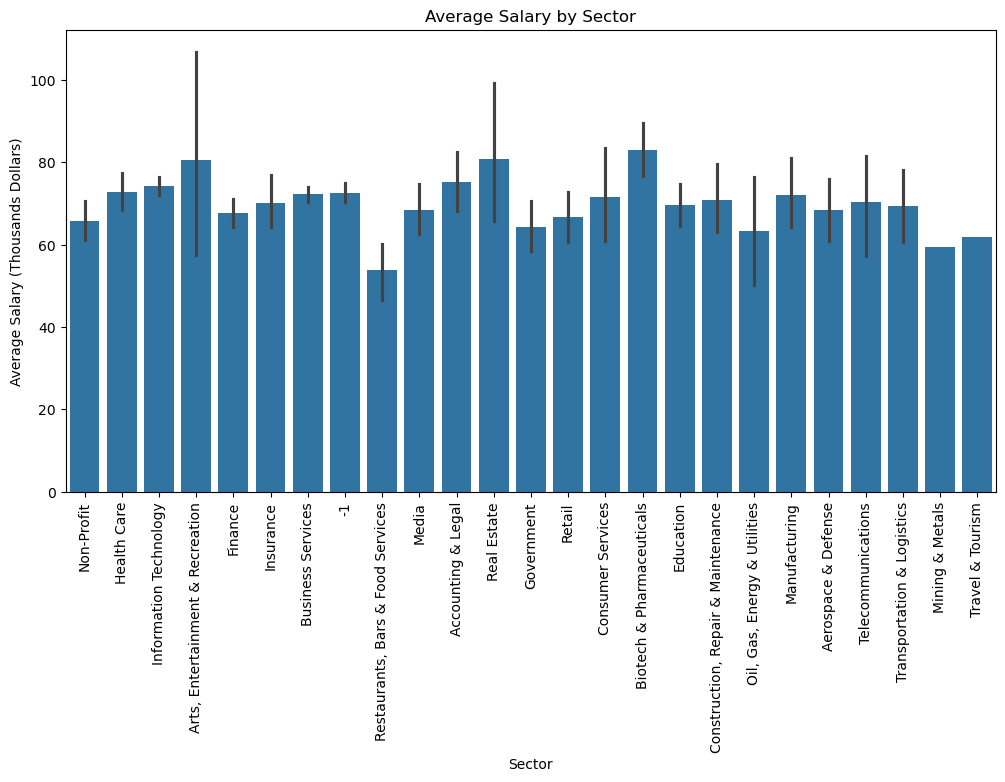

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df['Sector'], y=df['Avg Salary'])
plt.xticks(rotation=90)
plt.xlabel('Sector')
plt.ylabel('Average Salary (Thousands Dollars)')
plt.title('Average Salary by Sector')
plt.show()


In [22]:
df.drop('Salary Estimate', axis=1, inplace=True)

In [23]:
# Clean 'Company Name' (remove rating from text)
df['Company Name'] = df['Company Name'].str.split('\n').str[0]

In [24]:
# Define skill keywords
skills = ["Python", "SQL", "Tableau", "Excel", "Power BI", "Machine Learning", "Deep Learning", "NLP",
          "R", "Java", "C++", "Hadoop", "Spark", "AWS", "Google Cloud", "Azure"]

# Define degree keywords
degrees = ["Bachelor", "Master", "PhD", "Degree", "B.S.", "M.S.", "MBA"]

# Define experience pattern
experience_pattern = r"(\d+)[+-]? years?"

# Extract skills
def extract_skills(text):
    found_skills = [skill for skill in skills if skill.lower() in text.lower()]
    return ", ".join(found_skills) if found_skills else "None"

# Extract degree
def extract_degree(text):
    found_degrees = [deg for deg in degrees if deg.lower() in text.lower()]
    return ", ".join(found_degrees) if found_degrees else "Not specified"

# Extract experience level
def extract_experience(text):
    match = re.search(experience_pattern, text, re.IGNORECASE)
    return match.group(1) + " years" if match else "Not mentioned"

# Apply extraction functions
df["Skills"] = df["Job Description"].apply(extract_skills)
df["Degree Requirement"] = df["Job Description"].apply(extract_degree)
df["Experience Required"] = df["Job Description"].apply(extract_experience)

# Preview extracted features
print(df[["Job Description", "Skills", "Degree Requirement", "Experience Required"]].head())
df['Remote Job'] = df['Job Description'].apply(lambda x: 1 if 'remote' in x.lower() or 'work from home' in x.lower() else 0)
df.drop(['Job Description', 'Headquarters'], axis=1, inplace=True)

                                     Job Description  \
0  Are you eager to roll up your sleeves and harn...   
1  Overview\n\nProvides analytical and technical ...   
2  We’re looking for a Senior Data Analyst who ha...   
3  Requisition NumberRR-0001939\nRemote:Yes\nWe c...   
4  ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...   

                           Skills             Degree Requirement  \
0             Python, SQL, R, AWS                  Not specified   
1                   SQL, Excel, R       Bachelor, Master, Degree   
2  Python, SQL, Tableau, Excel, R  Bachelor, Master, PhD, Degree   
3            SQL, Tableau, R, AWS               Bachelor, Degree   
4           Python, SQL, Excel, R               Bachelor, Degree   

  Experience Required  
0             2 years  
1       Not mentioned  
2       Not mentioned  
3             3 years  
4             2 years  


In [25]:
from category_encoders.target_encoder import TargetEncoder
from category_encoders.binary import BinaryEncoder
import joblib
df["Has Competitor"] = df["Competitors"].apply(lambda x: 0 if x == "No competitor" else 1)
df.drop("Competitors", axis=1, inplace=True)

# Encode 'Easy Apply' as binary (True → 1, False → 0)
df["Easy Apply"] = df["Easy Apply"].astype(bool).astype(int)


# Extract job seniority from title
df["Seniority Level"] = df["Job Title"].apply(lambda x: "Senior" if "Senior" in x else "Junior" if "Junior" in x else "Mid")






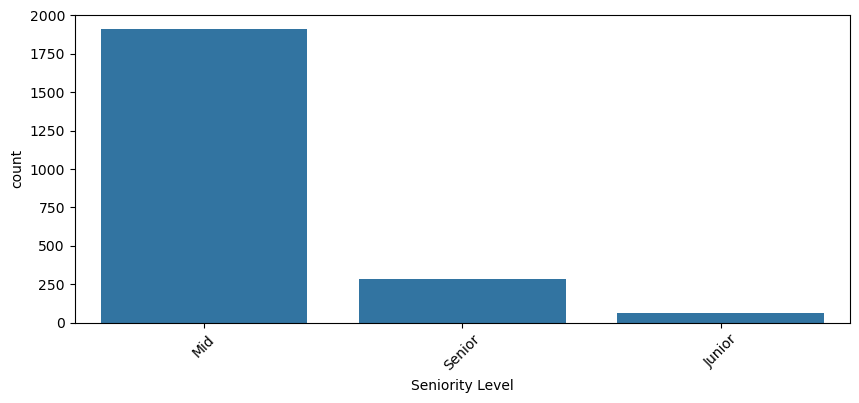

In [26]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Seniority Level", order=df["Seniority Level"].value_counts().index)
plt.xticks(rotation=45)
plt.show()


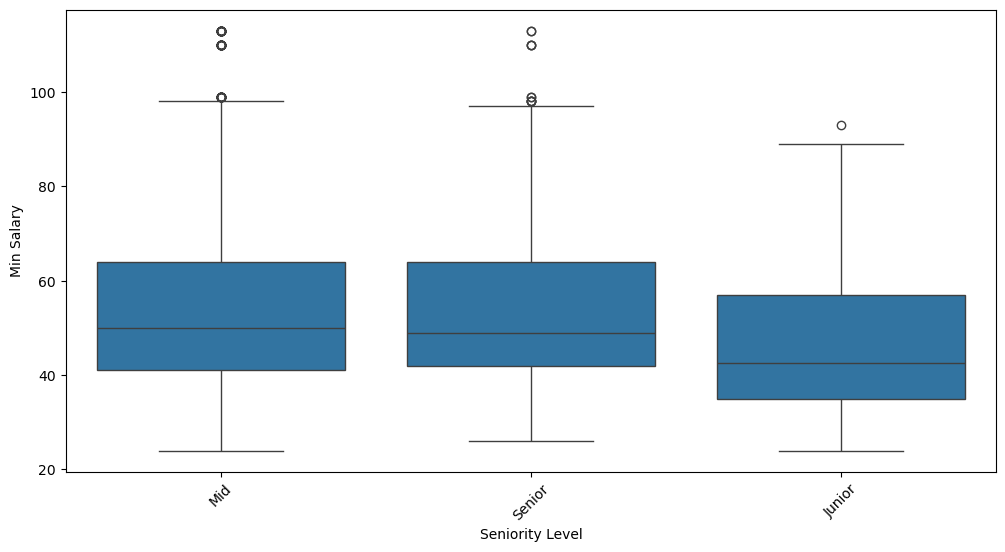

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Seniority Level", y="Min Salary")
plt.xticks(rotation=45)
plt.show()

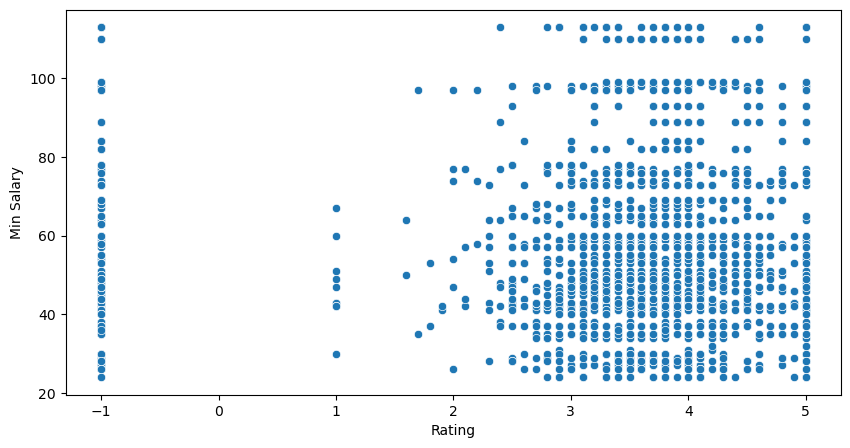

In [28]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["Rating"], y=df["Min Salary"])
plt.show()


In [29]:
dft=df.copy()
# Convert seniority levels to numerical
seniority_mapping = {"Junior": 1, "Mid": 2, "Senior": 3}
df["Seniority Level"] = df["Seniority Level"].map(seniority_mapping)
target_enc_cols = ['Job Title', 'Company Name', 'Location','Industry']
target_encoder = TargetEncoder(cols=target_enc_cols)
df[target_enc_cols] = target_encoder.fit_transform(df[target_enc_cols], df['Avg Salary'])
joblib.dump(target_encoder, "target_encoder.pkl")

['target_encoder.pkl']

In [30]:
# Convert Size into numerical categories
df['Size'].replace('-1', 'Unknown', inplace=True)
df['Revenue'].replace('-1', 'Unknown / Non-Applicable', inplace=True)

# Convert Size into numerical categories
size_mapping = {
    "Unknown": 0, "1 to 50 employees": 1, "51 to 200 employees": 2,
    "201 to 500 employees": 3, "501 to 1000 employees": 4,
    "1001 to 5000 employees": 5, "5001 to 10000 employees": 6, "10000+ employees": 7
}
df['Company Size Score'] = df['Size'].map(size_mapping)

# Convert Revenue into numerical categories
revenue_mapping = {
    "Unknown / Non-Applicable": 0, "Less than $1 million (USD)": 1, "$1 to $5 million (USD)": 2,
    "$5 to $10 million (USD)": 3, "$10 to $25 million (USD)": 4, "$25 to $50 million (USD)": 5,
    "$50 to $100 million (USD)": 6, "$100 to $500 million (USD)": 7, "$500 million to $1 billion (USD)": 8,
    "$1 to $2 billion (USD)": 9, "$2 to $5 billion (USD)": 10, "$5 to $10 billion (USD)": 11, "$10+ billion (USD)": 12
}
df['Revenue Score'] = df['Revenue'].map(revenue_mapping)


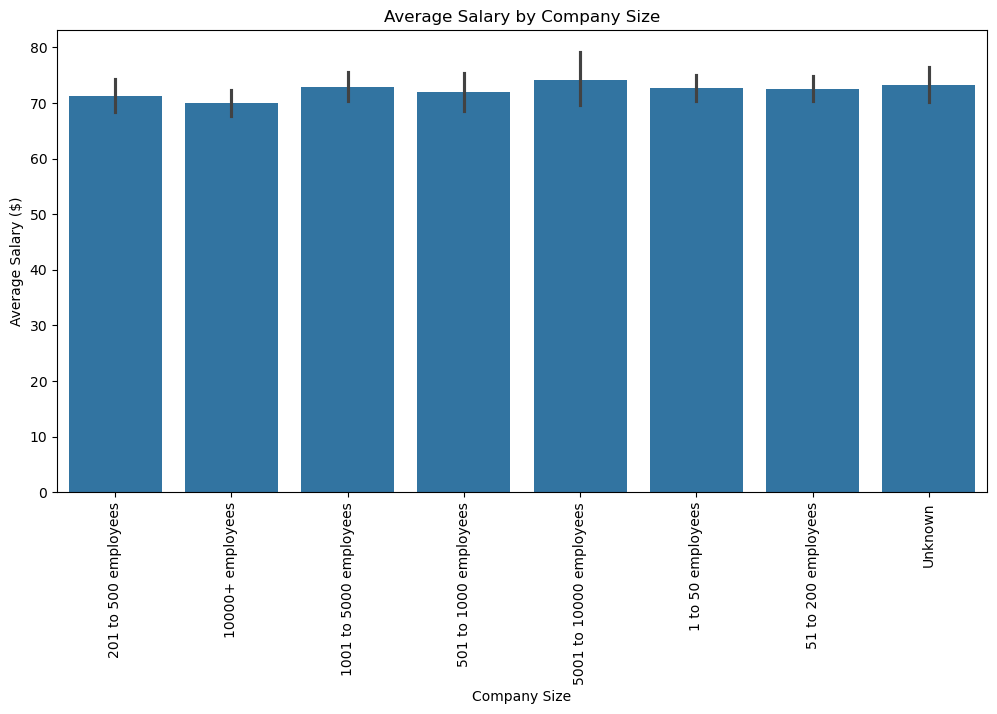

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df['Size'], y=df['Avg Salary'])
plt.xlabel('Company Size')
plt.ylabel('Average Salary ($)')
plt.title('Average Salary by Company Size')
plt.xticks(rotation=90)
plt.show()


In [32]:
df.drop(columns=['Size', 'Revenue'], inplace=True)

In [33]:
# Define Mapping for Generalization
degree_mapping = {
    "Not specified": "Not Specified",
    "Bachelor, Degree, B.S.": "Bachelor",
    "Bachelor": "Bachelor",
    "Bachelor, MBA": "Bachelor, MBA",
    "Bachelor, Master": "Bachelor, Master",
    "Bachelor, Master, MBA": "Bachelor, Master, MBA",
    "Master, Degree, B.S.": "Master",
    "Master": "Master",
    "Master, PhD": "Master, PhD",
    "PhD, Degree, M.S.": "PhD",
    "PhD": "PhD",
    "Bachelor, Master, PhD": "Bachelor, Master, PhD",
    "Bachelor, Master, Degree, MBA": "Bachelor, Master, MBA",
    "Bachelor, PhD, Degree": "Bachelor, PhD",
    "MBA": "MBA"
}

# Apply Mapping to Standardize Degrees
df["Degree Requirement"] = df["Degree Requirement"].replace(degree_mapping)

# Assign Ordinal Values (Based on Importance)
degree_order = {
    "Not Specified": 0,
    "Bachelor": 1,
    "Bachelor, MBA": 2,
    "Bachelor, Master": 3,
    "Bachelor, Master, MBA": 4,
    "Master": 5,
    "Master, PhD": 6,
    "PhD": 7,
    "Bachelor, Master, PhD": 8,
    "Bachelor, Master, MBA": 9,
    "Bachelor, PhD": 10,
    "MBA": 11
}

# Encode into Numeric Values
df["Degree Requirement"] = df["Degree Requirement"].map(degree_order).fillna(0).astype(int)

# Check Output
print(df["Degree Requirement"].unique())


[ 0  5  1  8  9 11  7  2  3 10  6]


In [34]:
# Count the number of skills in each row
df["Skill Count"] = df["Skills"].apply(lambda x: len(x.split(", ")) if x != "None" else 0)

# Drop the original Skills column
df.drop(columns=["Skills"], inplace=True)

# Preview the result
print(df[["Skill Count"]].head())


   Skill Count
0            4
1            3
2            5
3            4
4            4


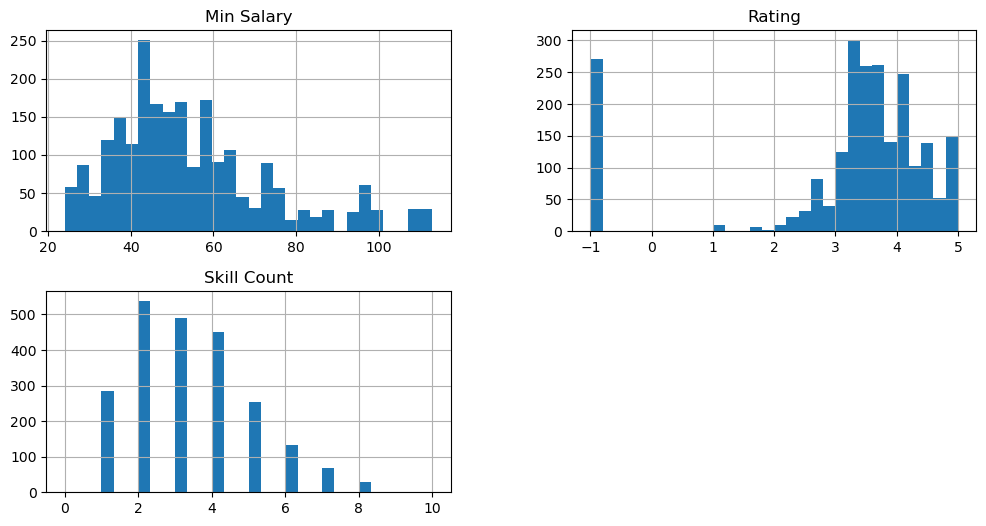

In [35]:
num_cols = ["Min Salary", "Rating", "Skill Count"]
df[num_cols].hist(figsize=(12, 6), bins=30)
plt.show()


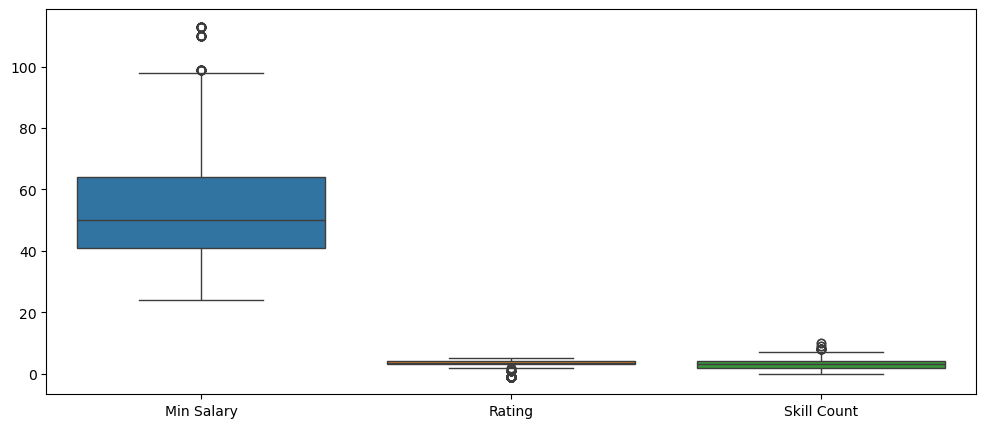

In [36]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[num_cols])
plt.show()



from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

def multi_label_encoding(df, column_name):
    """
    Converts a multi-label column (comma-separated values) into multiple binary columns.
    """
    # Convert all values to string and handle NaN
    df[column_name] = df[column_name].astype(str).apply(lambda x: x.split(', ') if x not in ["None", "Not specified", "nan"] else [])

    # Apply MultiLabelBinarizer
    mlb = MultiLabelBinarizer()
    encoded_df = pd.DataFrame(mlb.fit_transform(df[column_name]), columns=mlb.classes_)

    # Merge encoded columns with original dataframe
    df = pd.concat([df, encoded_df], axis=1)

    # Drop the original column
    df.drop(columns=[column_name], inplace=True)

    return df

# Apply encoding to Skills and Degree Requirement
df = multi_label_encoding(df, "Skills")
#df = multi_label_encoding(df, "Degree Requirement")

# Fill any remaining null values
df.fillna(0, inplace=True)

# Preview data
print(df.head())


In [37]:
df['Experience Required'] = df['Experience Required'].str.extract(r'(\d+)').astype(float)
df['Experience Required'].fillna(0, inplace=True)  # Fill missing values with 0

In [38]:
df

,Job Title,Rating,Company Name,Location,Founded,Type of ownership,Industry,Sector,Easy Apply,Min Salary,Max Salary,Avg Salary,Degree Requirement,Experience Required,Remote Job,Has Competitor,Seniority Level,Company Size Score,Revenue Score,Skill Count
0,69.436877,3.2,69.436877,71.235484,1961,Nonprofit Organization,68.129732,Non-Profit,1,37.0,66.0,51.5,0,2.0,0,0,2,3,7,4
1,68.403973,3.8,69.436877,71.235484,1893,Nonprofit Organization,72.807946,Health Care,0,37.0,66.0,51.5,0,0.0,0,0,2,7,10,3
2,69.436877,3.4,69.436877,71.235484,2003,Company - Private,79.578676,Information Technology,0,37.0,66.0,51.5,0,0.0,0,1,3,5,0,5
3,72.576733,4.1,69.436877,71.235484,2002,Subsidiary or Business Segment,71.349231,Information Technology,0,37.0,66.0,51.5,0,3.0,1,0,2,3,6,4
4,71.509069,3.9,69.436877,71.235484,2009,Company - Private,74.598375,"Arts, Entertainment & Recreation",1,37.0,66.0,51.5,0,2.0,0,1,2,4,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,74.576162,2.5,73.049876,71.798200,-1,Company - Private,73.222910,Business Services,0,78.0,104.0,91.0,0,1.0,0,0,2,2,0,1
2249,74.576162,2.9,74.576162,73.935085,1935,Company - Public,72.409207,Business Services,0,78.0,104.0,91.0,0,5.0,0,1,3,7,12,3
2250,74.576162,-1.0,74.958794,71.798200,-1,-1,72.690341,-1,0,78.0,104.0,91.0,0,10.0,0,0,2,0,0,3
2251,73.911297,3.1,74.576162,73.935085,1984,Company - Private,77.287604,Information Technology,0,78.0,104.0,91.0,0,8.0,0,0,2,3,5,5


In [39]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = ["Type of ownership", "Sector"]








label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Encode the column
    label_encoders[col] = le  # Store encoder for inverse transformation if needed

# Preview the encoded data
print(df.head())


for col in categorical_cols:
    print(f"Label Encoding Mapping for {col}:")
    print(dict(zip(label_encoders[col].classes_, label_encoders[col].transform(label_encoders[col].classes_))))


   Job Title  Rating  Company Name   Location  Founded  Type of ownership  \
0  69.436877     3.2     69.436877  71.235484     1961                  8   
1  68.403973     3.8     69.436877  71.235484     1893                  8   
2  69.436877     3.4     69.436877  71.235484     2003                  2   
3  72.576733     4.1     69.436877  71.235484     2002                 13   
4  71.509069     3.9     69.436877  71.235484     2009                  2   

    Industry  Sector  Easy Apply  Min Salary  Max Salary  Avg Salary  \
0  68.129732      17           1        37.0        66.0        51.5   
1  72.807946      11           0        37.0        66.0        51.5   
2  79.578676      12           0        37.0        66.0        51.5   
3  71.349231      12           0        37.0        66.0        51.5   
4  74.598375       3           1        37.0        66.0        51.5   

   Degree Requirement  Experience Required  Remote Job  Has Competitor  \
0                   0         

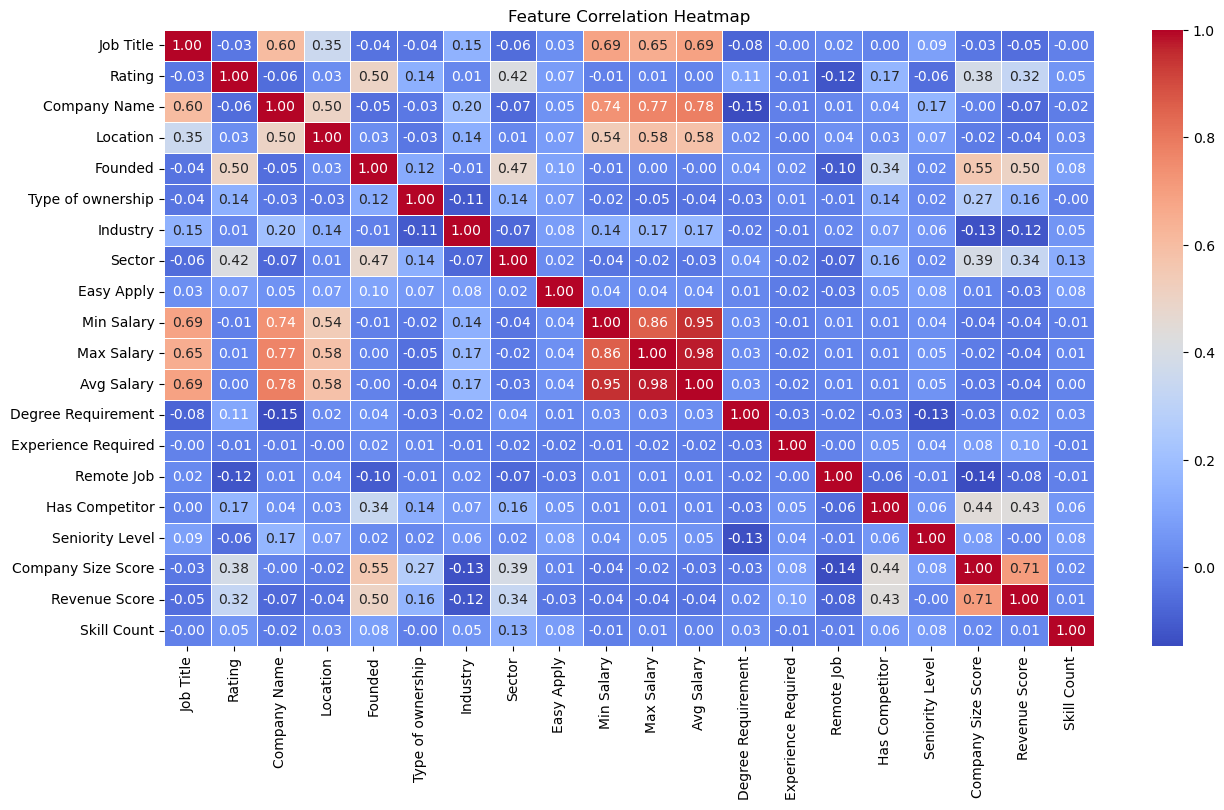

In [40]:
df_encoded = df.select_dtypes(include=[np.number])  # Selecting only numerical columns

# Compute correlation matrix
corr_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [55]:
df

,Job Title,Rating,Company Name,Location,Founded,Type of ownership,Industry,Sector,Easy Apply,Min Salary,Max Salary,Avg Salary,Degree Requirement,Experience Required,Remote Job,Has Competitor,Seniority Level,Company Size Score,Revenue Score,Skill Count
0,69.436877,3.2,69.436877,71.235484,1961,8,68.129732,17,1,37.0,66.0,51.5,0,2.0,0,0,2,3,7,4
1,68.403973,3.8,69.436877,71.235484,1893,8,72.807946,11,0,37.0,66.0,51.5,0,0.0,0,0,2,7,10,3
2,69.436877,3.4,69.436877,71.235484,2003,2,79.578676,12,0,37.0,66.0,51.5,0,0.0,0,1,3,5,0,5
3,72.576733,4.1,69.436877,71.235484,2002,13,71.349231,12,0,37.0,66.0,51.5,0,3.0,1,0,2,3,6,4
4,71.509069,3.9,69.436877,71.235484,2009,2,74.598375,3,1,37.0,66.0,51.5,0,2.0,0,1,2,4,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,74.576162,2.5,73.049876,71.798200,-1,2,73.222910,5,0,78.0,104.0,91.0,0,1.0,0,0,2,2,0,1
2249,74.576162,2.9,74.576162,73.935085,1935,3,72.409207,5,0,78.0,104.0,91.0,0,5.0,0,1,3,7,12,3
2250,74.576162,-1.0,74.958794,71.798200,-1,0,72.690341,0,0,78.0,104.0,91.0,0,10.0,0,0,2,0,0,3
2251,73.911297,3.1,74.576162,73.935085,1984,2,77.287604,12,0,78.0,104.0,91.0,0,8.0,0,0,2,3,5,5


Index(['Job Title', 'Rating', 'Company Name', 'Location', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Easy Apply', 'Min Salary',
       'Max Salary', 'Degree Requirement', 'Experience Required', 'Remote Job',
       'Has Competitor', 'Seniority Level', 'Company Size Score',
       'Revenue Score', 'Skill Count'],
      dtype='object')
✅ Features used during training: Index(['Company Name', 'Degree Requirement', 'Easy Apply', 'Has Competitor',
       'Job Title', 'Location', 'Rating', 'Remote Job', 'Seniority Level',
       'Skill Count'],
      dtype='object')

📌 RandomForest Performance:
  - Train R²: 0.8732, Test R²: 0.8418, CV R²: 0.8201
  - RMSE: 9.4478, MAE: 6.3519

📌 XGBoost Performance:
  - Train R²: 0.9056, Test R²: 0.8627, CV R²: 0.8446
  - RMSE: 8.8013, MAE: 5.6814

📌 GradientBoosting Performance:
  - Train R²: 0.8876, Test R²: 0.8561, CV R²: 0.8406
  - RMSE: 9.0116, MAE: 5.9020

📌 LightGBM Performance:
  - Train R²: 0.8791, Test R²: 0.8530, CV R²: 0.8303
  

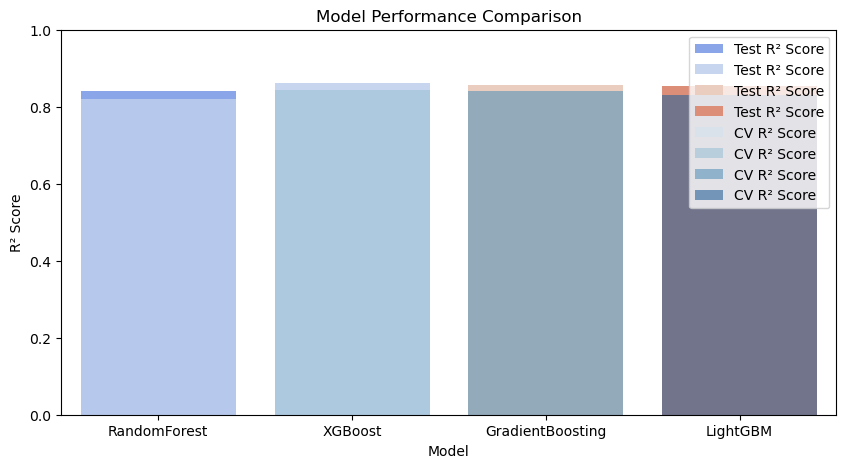

['best_gb_model.pkl']

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 🚀 Define Features & Target
X = df.drop(columns=['Avg Salary'])  # Features
y = df['Avg Salary']  # Target
print(x
# 🚀 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🚀 Feature Selection: Remove Highly Correlated Features
corr_matrix = X_train.corr()
high_corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.85:
            high_corr_features.add(corr_matrix.columns[i])

X_train.drop(columns=high_corr_features, inplace=True)
X_test.drop(columns=high_corr_features, inplace=True)

# 🚀 Recursive Feature Elimination (RFE)
model = LinearRegression()
rfecv = RFECV(model, step=1, cv=5)
rfecv.fit(X_train, y_train)
selected_features = X_train.columns[rfecv.support_]
# Keep only selected features
X_train = X_train[selected_features]
X_test = X_test[selected_features]

print("✅ Features used during training:", selected_features)

rf_params = {
    "n_estimators": 400,  # Reduce trees to avoid overfitting
    "max_depth": 8,  # Reduce depth for simpler trees
    "max_features": "sqrt",
    "min_samples_split": 10,  # Require more samples to split
    "min_samples_leaf": 4,  # Increase minimum leaf size
    "bootstrap": True
}

xgb_params = {
    "n_estimators": 1200,  # More trees for smoother learning
    "max_depth": 3,  # Reduce depth further
    "learning_rate": 0.025,  # Slightly lower learning rate
    "subsample": 0.7,  # Reduce data per tree
    "colsample_bytree": 0.7,  # Reduce features per tree
    "reg_alpha": 10,  # Stronger L1 regularization
    "reg_lambda": 15  # Stronger L2 regularization
}

gb_params = {
    "n_estimators": 1200,  
    "max_depth": 2,  # Reduce depth to avoid capturing noise
    "learning_rate": 0.025,  
    "subsample": 0.7,  
    "min_samples_split": 20,  
    "min_samples_leaf": 8  # Larger leaf size for simplicity
}

lgbm_params = {
    "n_estimators": 1200,  
    "max_depth": 3,  
    "learning_rate": 0.025,  
    "subsample": 0.7,  
    "min_data_in_leaf": 50,  # More data per leaf
    "lambda_l1": 10,  # Stronger L1
    "lambda_l2": 15  # Stronger L2
}


# 🚀 Initialize Models with Manual Hyperparameters
rf_model = RandomForestRegressor(**rf_params, random_state=42)
xgb_model = XGBRegressor(**xgb_params, objective="reg:squarederror", random_state=42)
gb_model = GradientBoostingRegressor(**gb_params, random_state=42)
lgbm_model = LGBMRegressor(**lgbm_params, random_state=42, verbose=-1)

# 🚀 Cross-validation settings
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# 🚀 Model Evaluation Function
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae = mean_absolute_error(y_test, y_test_pred)

    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
    r2_cv = np.mean(cv_scores)

    print(f"\n📌 {name} Performance:")
    print(f"  - Train R²: {r2_train:.4f}, Test R²: {r2_test:.4f}, CV R²: {r2_cv:.4f}")
    print(f"  - RMSE: {rmse:.4f}, MAE: {mae:.4f}")

    return r2_test, r2_cv

# 🏆 Evaluate All Models
r2_rf, cv_rf = evaluate_model(rf_model, "RandomForest")
r2_xgb, cv_xgb = evaluate_model(xgb_model, "XGBoost")
r2_gb, cv_gb = evaluate_model(gb_model, "GradientBoosting")
r2_lgbm, cv_lgbm = evaluate_model(lgbm_model, "LightGBM")

# 🚀 Compare Model Performance
models = ["RandomForest", "XGBoost", "GradientBoosting", "LightGBM"]
r2_scores_test = [r2_rf, r2_xgb, r2_gb, r2_lgbm]
r2_scores_cv = [cv_rf, cv_xgb, cv_gb, cv_lgbm]

plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=r2_scores_test, palette="coolwarm", label="Test R² Score")
sns.barplot(x=models, y=r2_scores_cv, palette="Blues", alpha=0.6, label="CV R² Score")
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.title("Model Performance Comparison")
plt.ylim(0, 1)
plt.legend()
plt.show()

# 📂 Save Best Model
joblib.dump(xgb_model, "best_gb_model.pkl")


Features used during training: Index(['Job Title', 'Rating', 'Company Name', 'Location', 'Easy Apply',
       'Min Salary', 'Degree Requirement', 'Remote Job', 'Has Competitor',
       'Seniority Level', 'Skill Count'],
      dtype='object')
📌 RandomForest Performance:
  - MAE: 1.090849963045085
  - RMSE: 2.4415162782338773
  - R² Score: 0.9894343408230913
📌 XGBoost Performance:
  - MAE: 1.2990496481072877
  - RMSE: 2.4414742793476174
  - R² Score: 0.989434704320239
📌 GradientBoosting Performance:
  - MAE: 1.2324373829988695
  - RMSE: 2.3093546335050545
  - R² Score: 0.9905472404934519
📌 LightGBM Performance:
  - MAE: 1.3044888869205526
  - RMSE: 2.3664117971424603
  - R² Score: 0.9900743720460894


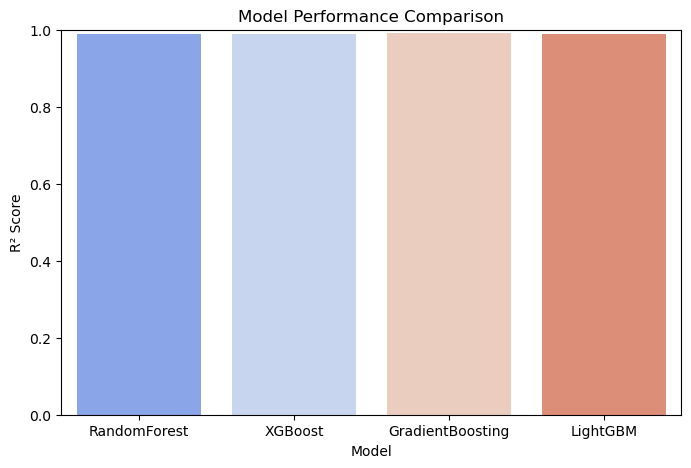

['best_gb_model.pkl']

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


X = df.drop(columns=['Avg Salary'])  # Features
y = df['Avg Salary']  # Target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


corr_matrix = X_train.corr()
high_corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.85:
            colname = corr_matrix.columns[i]
            high_corr_features.add(colname)
X_train.drop(columns=high_corr_features, inplace=True)
X_test.drop(columns=high_corr_features, inplace=True)


model = LinearRegression()
rfecv = RFECV(model, step=1, cv=5)
rfecv.fit(X_train, y_train)
selected_features = X_train.columns[rfecv.support_]
X_train = X_train[selected_features]
X_test = X_test[selected_features]
print("Features used during training:", selected_features)


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

def tune_model(model, params):
    search = RandomizedSearchCV(model, params, n_iter=20, cv=3, scoring="r2", n_jobs=-1, random_state=42)
    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_

# Train Models
best_rf, best_rf_params = tune_model(RandomForestRegressor(random_state=42), param_grid)
best_xgb, best_xgb_params = tune_model(XGBRegressor(objective="reg:squarederror", random_state=42), param_grid)
best_gb, best_gb_params = tune_model(GradientBoostingRegressor(random_state=42), param_grid)
best_lgbm, best_lgbm_params = tune_model(LGBMRegressor(random_state=42), param_grid)


def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"📌 {name} Performance:")
    print(f"  - MAE: {mae}")
    print(f"  - RMSE: {rmse}")
    print(f"  - R² Score: {r2}")
    return r2


r2_rf = evaluate_model(best_rf, "RandomForest")
r2_xgb = evaluate_model(best_xgb, "XGBoost")
r2_gb = evaluate_model(best_gb, "GradientBoosting")
r2_lgbm = evaluate_model(best_lgbm, "LightGBM")

# Compare Model Performance
models = ["RandomForest", "XGBoost", "GradientBoosting", "LightGBM"]
r2_scores = [r2_rf, r2_xgb, r2_gb, r2_lgbm]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=r2_scores, palette="coolwarm")
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.title("Model Performance Comparison")
plt.ylim(0, 1)
plt.show()
joblib.dump(best_gb, "best_gb_model.pkl")


In [51]:
import pandas as pd

# Display all columns without truncation
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

# Print the complete first row
print(dft.iloc[0])

Job Title              Data Analyst, Center on Immigration and Justice (CIJ)
Rating                                                                   3.2
Company Name                                       Vera Institute of Justice
Location                                                        New York, NY
Size                                                    201 to 500 employees
Founded                                                                 1961
Type of ownership                                     Nonprofit Organization
Industry                                                   Social Assistance
Sector                                                            Non-Profit
Revenue                                           $100 to $500 million (USD)
Easy Apply                                                                 1
Min Salary                                                              37.0
Max Salary                                                              66.0

In [54]:
import numpy as np
import pandas as pd
import joblib
from category_encoders.target_encoder import TargetEncoder

# Load trained model
best_gb = joblib.load("best_gb_model.pkl")  # Ensure the model file exists

# Load the exact feature list from training
selected_features = [
    "Job Title", "Rating", "Company Name", "Location", "Easy Apply",
    "Min Salary", "Degree Requirement", "Remote Job", "Has Competitor",
    "Seniority Level", "Skill Count"
]  # Ensure this matches the trained model features

# Define a sample job posting with the correct features
sample_input = {
    "Job Title": "Data Analyst, Center on Immigration and Justice (CIJ)",
    "Rating": 3.2,
    "Company Name":"Vera Institute of Justice",
    "Location":"New York, NY",
    "Easy Apply": 1,
    "Min Salary": 87.0,
    "Degree Requirement": "Not Specified",
    "Remote Job": 0,
    "Has Competitor": 0,
    "Seniority Level": "Mid",
    "Skill Count": 4,
    "Industry":"Social Assistance"
}

# Convert Seniority Level
seniority_mapping = {"Junior": 1, "Mid": 2, "Senior": 3}
sample_input["Seniority Level"] = seniority_mapping.get(sample_input["Seniority Level"], 0)

# Convert Degree Requirement
degree_order = {
    "Not Specified": 0, "Bachelor": 1, "Bachelor, MBA": 2, "Bachelor, Master": 3,
    "Bachelor, Master, MBA": 4, "Master": 5, "Master, PhD": 6, "PhD": 7,
    "Bachelor, Master, PhD": 8, "Bachelor, PhD": 10, "MBA": 11
}
sample_input["Degree Requirement"] = degree_order.get(sample_input["Degree Requirement"], 0)

# Create DataFrame
sample_df = pd.DataFrame([sample_input])

# Load Target Encoder (Ensure you saved the encoder after training)
target_encoder = joblib.load("target_encoder.pkl")  # Load the encoder used during training
target_encoded_cols = ["Job Title", "Company Name", "Location","Industry"]

# Apply Target Encoding
sample_df[target_encoded_cols] = target_encoder.transform(sample_df[target_encoded_cols])

# Ensure only selected features are used
sample_df = sample_df[selected_features]  # Use only the features from training

# Predict salary using the trained model
predicted_salary = best_gb.predict(sample_df)

print(f"💰 Predicted Salary: ${predicted_salary[0]:,.2f}")


💰 Predicted Salary: $119.18


In [45]:
print(df["Avg Salary"].min())

33.5


In [46]:
print(df["Avg Salary"].max())

150.0


In [47]:
123.37

123.37